In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression, f_regression

1. Исходные данные

In [2]:
# Фиксация генератора случайных чисел
random_seed = 2022  # dataset_0: 2022
np.random.seed(random_seed)

# Число признаков
N_feat = 5

# Число строк (число измерений)
N_rows = 1000

# Точные значения коэффициентов регрессии
z_acc = (0.040, 0.035, 0.03, 0.020, 0.016)

# Отн. погрешность коэффициентов регрессии
q = 0.

# Начальные значения матрицы A
A_0 = [400, 200, 450, 600, 200]

# Коэффициенты увеличения значений элементов матрицы A
k_values = [1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows]

# Отн. погрешности значений элементов матрицы A и вектора b
k_A = 0.01
k_b = 0.05

2. Запись z_acc в файл

In [3]:
df_z_acc = pd.DataFrame(z_acc)
file_path = 'C:\Datasets/dataset_z_acc.xlsx'
df_z_acc.to_excel(file_path, index=False, float_format='%.20f')

3. Формирование вектора z_real, матрицы A и вектора b

In [4]:
# Генерация вектора z_phase
z_real = z_acc * np.random.uniform(1, 1 + q, N_feat)
z_real

array([0.04 , 0.035, 0.03 , 0.02 , 0.016])

In [5]:
# Создание пустой матрицы A
A = np.zeros((N_rows, N_feat))
# Заполнение первой строки матрицы A
A[0] = A_0
# Заполнение остальных строк матрицы A
for i in range(1, N_rows):
    A[i] = A[i-1]
    for j in range(N_feat):
        A[i, j:j+1] *= np.random.uniform(1, 1 + k_values[j])

b = np.sum(A * z_real, axis=1)

# Генерация названий столбцов
column_names_0 = []

for i in range(1, N_feat + 1):
    column_names_0.append(f"A_{i}")

df_0 = pd.DataFrame(A, columns=column_names_0)
df_0["b"] = b
file_path = 'C:\Datasets/dataset_0.xlsx'
df_0.to_excel(file_path, index=False, float_format='%.20f')
df_0

,A_1,A_2,A_3,A_4,A_5,b
0,400.000000,200.000000,450.000000,600.000000,200.000000,51.700000
1,400.292193,200.269297,450.437030,600.807267,200.216340,51.753831
2,400.791369,200.517902,451.000243,601.669766,200.326873,51.818414
3,401.088859,200.620018,451.419287,602.551991,200.355850,51.864567
4,401.536598,200.708040,451.621529,603.232097,200.361460,51.905317
...,...,...,...,...,...,...
995,842.597474,419.452447,961.849444,1254.547743,424.564157,109.124199
996,843.053713,419.606433,962.188735,1254.919824,424.848796,109.170013
997,843.410518,419.899076,962.810333,1256.363727,424.926962,109.243304
998,844.528035,420.518710,963.678407,1257.614994,425.024877,109.362326


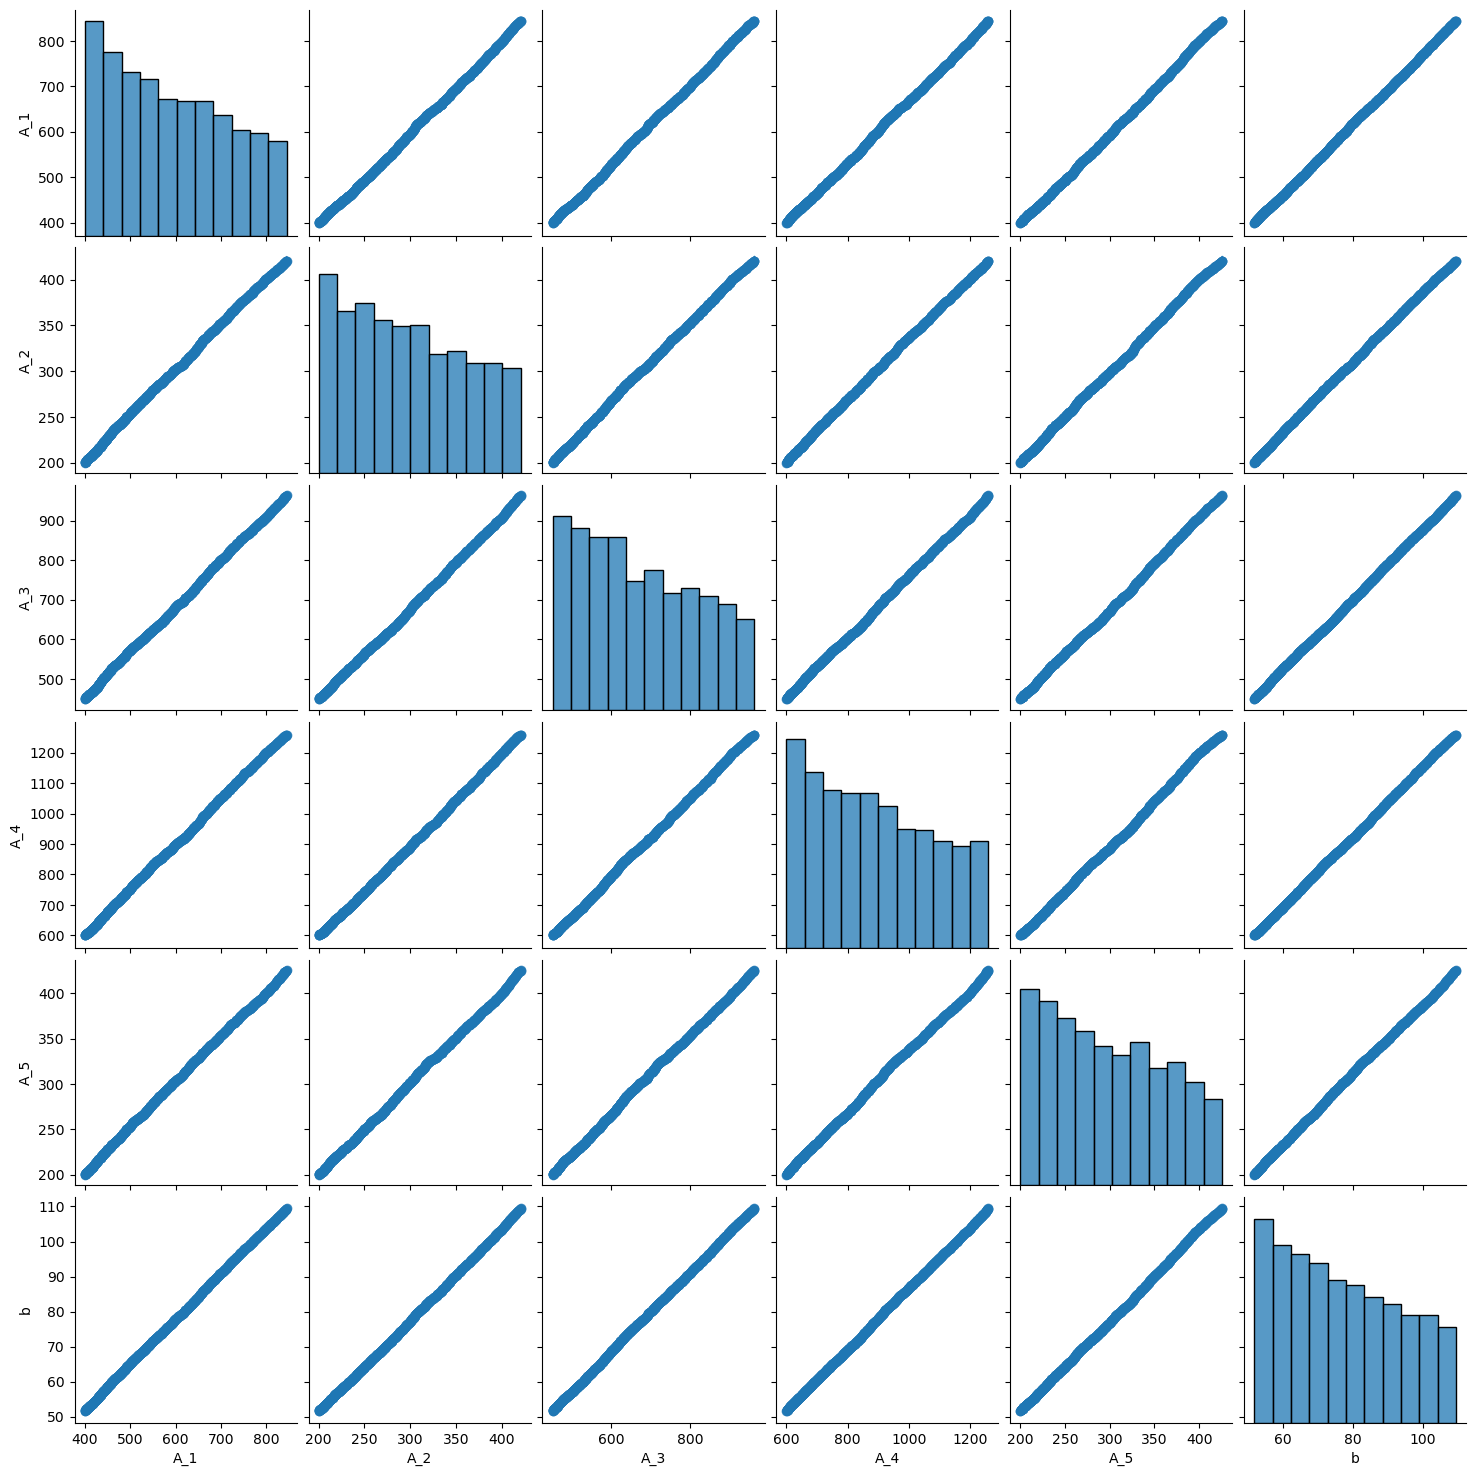

In [6]:
sns.pairplot(df_0, kind="reg")
plt.show()

4. Генерация матрицы A_h и вектора b_d, заданных с погрешностями k_A и k_b

In [7]:
# Фиксация генератора случайных чисел для генерации матрицы A_h и вектора b_d
random_seed = 1986  # dataset_1: 1986  dataset_2: 2017
np.random.seed(random_seed)

In [8]:
random_values_1 = np.random.uniform(1 - k_A, 1 + k_A, size=A.shape)
random_values_2 = np.random.uniform(1 - k_b, 1 + k_b, size=b.shape)
A_h = A * random_values_1
b_d = b * random_values_2
# Генерация названий столбцов
column_names = []

for i in range(1, N_feat + 1):
    column_names.append(f"A_h_{i}")

df = pd.DataFrame(A_h, columns=column_names)
df["b_d"] = b_d
file_path = 'C:\Datasets/dataset_1.xlsx'
df.to_excel(file_path, index=False, float_format='%.20f')
df

,A_h_1,A_h_2,A_h_3,A_h_4,A_h_5,b_d
0,396.167682,201.068281,449.531278,595.446499,201.723092,53.882523
1,401.489470,198.830046,448.019033,597.520554,199.255522,51.721333
2,397.688220,201.046888,449.983762,599.458577,200.851291,49.887276
3,399.441596,202.404993,448.274030,597.444386,201.172940,49.954170
4,398.084027,199.933461,450.104254,600.935263,200.111630,54.127807
...,...,...,...,...,...,...
995,845.472312,420.591607,959.475858,1246.340278,426.169296,104.902990
996,841.119662,422.847882,957.424843,1258.625666,426.224794,113.592514
997,838.192762,418.465090,961.549883,1251.119968,428.174288,111.551229
998,851.904873,423.500681,957.924750,1254.562030,426.352818,105.260529


In [9]:
# sns.pairplot(df, kind="reg")
# plt.show()

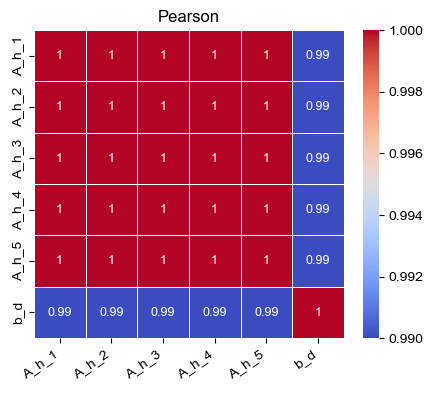

In [10]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5. Анализ значимости признаков

In [11]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df, features = df.columns)

,VIF,Tolerance
A_h_1,823.485601,0.001214
A_h_2,828.293147,0.001207
A_h_3,856.754941,0.001167
A_h_4,904.787438,0.001105
A_h_5,737.895487,0.001355
b_d,52.168859,0.019169


MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [12]:
X = df.copy()
y = X.pop('b_d')
mi_full = mutual_info_regression(X, y, random_state=2023)
f_full = f_regression(X, y)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X.corrwith(y), 'f':f_full[0], 'p':f_full[1]}, index=X.columns)
f_p_full.round(3)

,MI,corr,f,p
A_h_1,1.997,0.99,49349.831,0.0
A_h_2,1.979,0.99,47528.286,0.0
A_h_3,1.991,0.99,49281.365,0.0
A_h_4,2.005,0.99,49628.921,0.0
A_h_5,1.950,0.99,47106.986,0.0
